# Motion data exploration

Tools for exploring motion data and visualizing it.

In [1]:
import os
from os.path import join as pjoin
from tqdm import tqdm
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation, PillowWriter
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import mpl_toolkits.mplot3d.axes3d as p3


def plot_3d_motion(save_path, kinematic_tree, joints, title, figsize=(10, 10), fps=120, radius=4):
#     matplotlib.use('Agg')

    title_sp = title.split(' ')
    if len(title_sp) > 10:
        title = '\n'.join([' '.join(title_sp[:10]), ' '.join(title_sp[10:])])
    def init():
        ax.set_xlim3d([-radius / 2, radius / 2])
        ax.set_ylim3d([0, radius])
        ax.set_zlim3d([0, radius])
        # print(title)
        fig.suptitle(title, fontsize=20)
        ax.grid(b=False)

    def plot_xzPlane(minx, maxx, miny, minz, maxz):
        ## Plot a plane XZ
        verts = [
            [minx, miny, minz],
            [minx, miny, maxz],
            [maxx, miny, maxz],
            [maxx, miny, minz]
        ]
        xz_plane = Poly3DCollection([verts])
        xz_plane.set_facecolor((0.5, 0.5, 0.5, 0.5))
        ax.add_collection3d(xz_plane)

    #         return ax

    # (seq_len, joints_num, 3)
    data = joints.copy().reshape(len(joints), -1, 3)
    fig = plt.figure(figsize=figsize)
    ax = p3.Axes3D(fig)
    init()
    MINS = data.min(axis=0).min(axis=0)
    MAXS = data.max(axis=0).max(axis=0)
    colors = ['red', 'blue', 'black', 'red', 'blue',  
              'darkblue', 'darkblue', 'darkblue', 'darkblue', 'darkblue',
             'darkred', 'darkred','darkred','darkred','darkred']
    frame_number = data.shape[0]
    #     print(data.shape)

    height_offset = MINS[1]
    data[:, :, 1] -= height_offset
    trajec = data[:, 0, [0, 2]]
    
    data[..., 0] -= data[:, 0:1, 0]
    data[..., 2] -= data[:, 0:1, 2]

    #     print(trajec.shape)

    def update(index):
        #         print(index)
        ax.lines = []
        ax.collections = []
        ax.view_init(elev=120, azim=-90)
        ax.dist = 7.5
        #         ax =
        plot_xzPlane(MINS[0]-trajec[index, 0], MAXS[0]-trajec[index, 0], 0, MINS[2]-trajec[index, 1], MAXS[2]-trajec[index, 1])
#         ax.scatter(data[index, :22, 0], data[index, :22, 1], data[index, :22, 2], color='black', s=3)
        
        if index > 1:
            ax.plot3D(trajec[:index, 0]-trajec[index, 0], np.zeros_like(trajec[:index, 0]), trajec[:index, 1]-trajec[index, 1], linewidth=1.0,
                      color='blue')
        #             ax = plot_xzPlane(ax, MINS[0], MAXS[0], 0, MINS[2], MAXS[2])
        
        
        for i, (chain, color) in enumerate(zip(kinematic_tree, colors)):
#             print(color)
            if i < 5:
                linewidth = 4.0
            else:
                linewidth = 2.0
            ax.plot3D(data[index, chain, 0], data[index, chain, 1], data[index, chain, 2], linewidth=linewidth, color=color)
        #         print(trajec[:index, 0].shape)

        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_zticklabels([])

    ani = FuncAnimation(fig, update, frames=frame_number, interval=1000/fps, repeat=False)

    ani.save(save_path, fps=fps)
    plt.close()

## Exploring HumanML3D data

In [22]:
src_dir = './dataset/HumanML3D/new_joints/'
txt_dir = './dataset/HumanML3D/texts/'
tgt_ani_dir = "./save/animations/"

In [3]:
kinematic_chain = [[0, 2, 5, 8, 11], [0, 1, 4, 7, 10], [0, 3, 6, 9, 12, 15], [9, 14, 17, 19, 21], [9, 13, 16, 18, 20]]
os.makedirs(tgt_ani_dir, exist_ok=True)

In [4]:
npy_files = os.listdir(src_dir)
npy_files = sorted(npy_files)

In [5]:
#for npy_file in tqdm(npy_files):

npy_file = npy_files[2]

In [6]:
npy_file

'000002.npy'

In [24]:
data = np.load(pjoin(src_dir, npy_file))
save_path = pjoin(tgt_ani_dir, npy_file[:-3] + 'mp4')
text_data = open(pjoin(txt_dir, npy_file[:-3] + 'txt'), 'r').read()
text_data = text_data.split('#')
text = text_data[0]
plot_3d_motion(save_path, kinematic_chain, data, title=text, fps=20, radius=4)

Max frames 469
Min frames 3
Mean frames 140.87825908437694
Total frames 4117308


(array([4.5600e+02, 1.3500e+03, 2.5900e+03, 3.7860e+03, 3.3600e+03,
        2.4080e+03, 2.3080e+03, 2.0580e+03, 1.0826e+04, 2.4000e+01,
        1.6000e+01, 1.4000e+01, 6.0000e+00, 1.0000e+01, 4.0000e+00,
        2.0000e+00, 4.0000e+00, 2.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([  3. ,  26.3,  49.6,  72.9,  96.2, 119.5, 142.8, 166.1, 189.4,
        212.7, 236. , 259.3, 282.6, 305.9, 329.2, 352.5, 375.8, 399.1,
        422.4, 445.7, 469. ]),
 <a list of 20 Patch objects>)

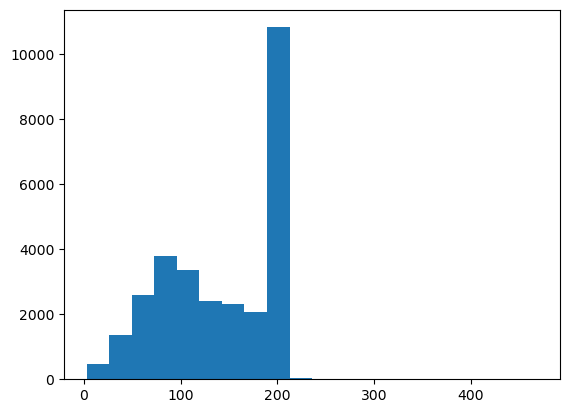

In [21]:
max_frames = 0
min_frames = 1000
frames = []
for file in npy_files:
    data = np.load(pjoin(src_dir, file))
    #print("Element", data)
    #print("Element shape", data.shape)
    frames.append(data.shape[0])
    if data.shape[0] > max_frames:
        max_frames = data.shape[0]
    if data.shape[0] < min_frames:
        min_frames = data.shape[0]

print("Max frames", max_frames)
print("Min frames", min_frames)
print("Mean frames", np.mean(frames))
print("Total frames", np.sum(frames))

# Plot histogram of frames
plt.hist(frames, bins=20)

In [9]:
print("Motion shape", data.shape)

Motion shape (187, 22, 3)


In [10]:
from data_loaders.get_data import get_dataset_loader

print("creating data loader...")
data = get_dataset_loader(name="humanml", batch_size=1, num_frames=100)


/home/apujol/.conda/envs/main/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


creating data loader...
Reading ././dataset/humanml_opt.txt
Loading dataset t2m ...


100%|██████████| 23384/23384 [01:15<00:00, 308.19it/s]

Pointer Pointing at 0


In [11]:
print(data)

In [13]:
for batch in data:
    motion, caption = batch
    print(motion.shape)
    print(caption['y']['text'])

torch.Size([1, 263, 1, 196])
['person is casually dancing to music']
torch.Size([1, 263, 1, 196])
['a person standing still suddenly steps forward and to their left with their right foot, and then steps back to the same position.']
torch.Size([1, 263, 1, 196])
['a person throws an uppercut from the left arm.']
torch.Size([1, 263, 1, 196])
['the toon is standing still, raising their left and making a circular motion before resting once again at their side.']
torch.Size([1, 263, 1, 196])
['a person is walking up stairs.']
torch.Size([1, 263, 1, 196])
['a person walks forward and places both hands on hips then walks backwards.']
torch.Size([1, 263, 1, 196])
['the person is limping with their left leg.']
torch.Size([1, 263, 1, 196])
['the person is walking on a trendmil.']
torch.Size([1, 263, 1, 196])
['person is using a touch screen']
torch.Size([1, 263, 1, 196])
['person puts object on a top shelf.']
torch.Size([1, 263, 1, 196])
['a person waves their right hand, spreads their arms out a

KeyboardInterrupt: 

## Exploring KIT-ML data

In [19]:
kit_src_dir = './dataset/KIT-ML/new_joints/'
tgt_ani_dir = "./save/animations/"

In [20]:
kit_npy_files = os.listdir(src_dir)
kit_npy_files = sorted(kit_npy_files)

In [21]:
max_frames = 0
min_frames = 1000
for file in kit_npy_files:
    data = np.load(pjoin(kit_src_dir, file))
    #print("Element", data)
    #print("Element shape", data.shape)
    if data.shape[0] > max_frames:
        max_frames = data.shape[0]
    if data.shape[0] < min_frames:
        min_frames = data.shape[0]

print("Max frames", max_frames)
print("Min frames", min_frames)

Max frames 2868
Min frames 5


In [29]:
print("Motion shape", data.shape)

Motion shape (71, 21, 3)


In [28]:
kinematic_chain = [[0, 2, 5, 8, 11], [0, 1, 4, 7, 10], [0, 3, 6, 9, 12, 15], [9, 14, 17, 19], [9, 13, 16, 18, 20]]

data = np.load(pjoin(kit_src_dir, kit_npy_files[2]))
save_path = pjoin(tgt_ani_dir, kit_npy_files[0][:-3] + 'mp4')
plot_3d_motion(save_path, kinematic_chain, data, title="None", fps=20, radius=4)

## Exploring MotionX data

In [1]:
import os

motionx_scr_dir = './datasets/MotionX/Motion-X/datasets'

# Set directories
face_dir = os.path.join(motionx_scr_dir, 'face_motion_data/smplx_322')
motioin_dir = os.path.join(motionx_scr_dir, 'motion_data/smplx_322')
face_text_dir = os.path.join(motionx_scr_dir, 'texts/face_texts')
motion_text_dir = os.path.join(motionx_scr_dir, 'texts/semantic_labels')

print("Face dir", face_dir)
print("Motion dir", motioin_dir)
print("Face text dir", face_text_dir)
print("Motion text dir", motion_text_dir)

Face dir ./datasets/MotionX/Motion-X/datasets/face_motion_data/smplx_322
Motion dir ./datasets/MotionX/Motion-X/datasets/motion_data/smplx_322
Face text dir ./datasets/MotionX/Motion-X/datasets/texts/face_texts
Motion text dir ./datasets/MotionX/Motion-X/datasets/texts/semantic_labels


In [1]:
import torch
from datasets.MotionX.MotionX.tomato_represenation.smplx2joints import get_smplx_layer, process_smplx_322_data
from datasets.MotionX.MotionX.tomato_represenation.dataset import MotionDatasetV2, mld_collate, Text2MotionDataset, t2m_collate
from torch.utils.data import DataLoader
from collections import defaultdict

/home/apujol/.conda/envs/main/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
os.environ['PYOPENGL_PLATFORM'] = 'egl'
comp_device = torch.device("cuda:5" if torch.cuda.is_available() else "cpu")

In [6]:
print('Loading SMPL-X model...')
# Get SMPLX layer and model using a custom function get_smplx_layer
smplx_layer, smplx_model = get_smplx_layer(comp_device)
print('smplx_layer: ', smplx_layer)
print('smplx_model: ', smplx_model)
print('Done!')

Loading SMPL-X model...


KeyboardInterrupt: 

In [1]:
import os
import torch
from datasets.MotionX.MotionX.tomato_represenation.smplx2joints import get_smplx_layer, process_smplx_322_data
from datasets.MotionX.MotionX.tomato_represenation.dataset import MotionDatasetV2, mld_collate
from torch.utils.data import DataLoader
from collections import defaultdict

print('Loading motion data...')
# change your path here with Motion-X SMPLX format with 322 dims
train_dataset = MotionDatasetV2(root_path='/home/apujol/mbld/datasets/MotionX/MotionX/datasets/motion_data/smplx_322',
                                debug=True)
print('Done!')

/home/apujol/.conda/envs/main/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading motion data...
Searching for files in /home/apujol/mbld/datasets/MotionX/MotionX/datasets/motion_data/smplx_322...


  6%|▌         | 6/100 [00:00<00:01, 54.18it/s]

Motion:  perform/subset_0001/Move_Goods_clip_4
Motion:  perform/subset_0001/Drink_Cold_Water_clip_5
Motion:  perform/subset_0001/Drink_Hot_Water
Motion:  perform/subset_0001/Nap
Motion:  perform/subset_0001/Seasoning
Motion:  perform/subset_0001/Search_Key_clip_1
Motion:  perform/subset_0001/Eat_Apple
Motion:  perform/subset_0001/Perform_clip_6
Motion:  perform/subset_0001/Hesitate_clip_1
Motion:  perform/subset_0001/Pick_Eggshells_clip_1
Motion:  perform/subset_0001/Drink_Water


 18%|█▊        | 18/100 [00:00<00:01, 53.50it/s]

Motion:  perform/subset_0001/Dish_Up_clip_3
Motion:  perform/subset_0001/Perform_clip_7
Motion:  perform/subset_0001/Paint_clip_3
Motion:  perform/subset_0001/Drink_Cold_Water
Motion:  perform/subset_0001/Fan_clip_1
Motion:  perform/subset_0001/Dry_Clothes_clip_3
Motion:  perform/subset_0001/Eat_clip_4
Motion:  perform/subset_0001/Quarrel
Motion:  perform/subset_0001/Say_Goodbye_clip_1


 30%|███       | 30/100 [00:00<00:01, 51.55it/s]

Motion:  perform/subset_0001/Drunk_clip_1
Motion:  perform/subset_0001/Pick_Hot_Towel_clip_1
Motion:  perform/subset_0001/Perform_clip_2
Motion:  perform/subset_0001/Fetch_Snow
Motion:  perform/subset_0001/Drag_Goods_clip_2
Motion:  perform/subset_0001/Fan
Motion:  perform/subset_0001/Put_On_Apron
Motion:  perform/subset_0001/Dry_Clothes_clip_5
Motion:  perform/subset_0001/Drink_Hot_Water_clip_1
Motion:  perform/subset_0001/Dish_Up_clip_4
Motion:  perform/subset_0001/Foot_Touch_Hot_Water_clip_3
Motion:  perform/subset_0001/Make_Dumplings_clip_3


 42%|████▏     | 42/100 [00:00<00:01, 54.44it/s]

Motion:  perform/subset_0001/Put_Out_Cigarette
Motion:  perform/subset_0001/Fetch_Flower_clip_2
Motion:  perform/subset_0001/Defuse_Bomb_clip_1
Motion:  perform/subset_0001/Reach_Out_clip_4
Motion:  perform/subset_0001/Eat_clip_1
Motion:  perform/subset_0001/Inspect_Leak
Motion:  perform/subset_0001/Reach_Out_clip_5
Motion:  perform/subset_0001/Fetch_Bottle_clip_3
Motion:  perform/subset_0001/Pick_Up
Motion:  perform/subset_0001/Search_Key
Motion:  perform/subset_0001/Foot_Touch_Hot_Water_clip_4
Motion:  perform/subset_0001/Nervous


 55%|█████▌    | 55/100 [00:01<00:00, 56.26it/s]

Motion:  perform/subset_0001/Foot_Touch_Hot_Water_clip_5
Motion:  perform/subset_0001/Fetch_Seasoning
Motion:  perform/subset_0001/Quit_Smoke
Motion:  perform/subset_0001/Pick_Hot_Towel_clip_3
Motion:  perform/subset_0001/Post_Paper_clip_1
Motion:  perform/subset_0001/Neck_Stuck_clip_1
Motion:  perform/subset_0001/Dish_Up
Motion:  perform/subset_0001/Read_Paper
Motion:  perform/subset_0001/Inspect_Leak_clip_1
Motion:  perform/subset_0001/Fix_Water_Leak_clip_1
Motion:  perform/subset_0001/Paint_clip_4
Motion:  perform/subset_0001/Make_Dumplings_clip_2


 68%|██████▊   | 68/100 [00:01<00:00, 58.27it/s]

Motion:  perform/subset_0001/Move_Goods_clip_3
Motion:  perform/subset_0001/Drink_Water_Drunk
Motion:  perform/subset_0001/Play_Phone
Motion:  perform/subset_0001/Dry_Towel_clip_1
Motion:  perform/subset_0001/Dry_Clothes_clip_1
Motion:  perform/subset_0001/Organize_Clothes
Motion:  perform/subset_0001/Fetch_Bottle_clip_1
Motion:  perform/subset_0001/Dry_Clothes_clip_4
Motion:  perform/subset_0001/Panic_Buying_clip_1
Motion:  perform/subset_0001/Move_Goods_clip_5
Motion:  perform/subset_0001/Reach_Out_clip_2
Motion:  perform/subset_0001/Move_Goods_clip_1
Motion:  perform/subset_0001/Search_Someone


 80%|████████  | 80/100 [00:01<00:00, 57.94it/s]

Motion:  perform/subset_0001/Drink_Cold_Water_clip_3
Motion:  perform/subset_0001/Flick_Feet
Motion:  perform/subset_0001/Make_Dumplings_clip_4
Motion:  perform/subset_0001/Say_Goodbye
Motion:  perform/subset_0001/Get_Water_clip_2
Motion:  perform/subset_0001/Put_On_Clothes
Motion:  perform/subset_0001/Sit_Down_Sauna_clip_2
Motion:  perform/subset_0001/Hungry_clip_1
Motion:  perform/subset_0001/Drink_Beer
Motion:  perform/subset_0001/Pick_Eggshells
Motion:  perform/subset_0001/Foot_Touch_Hot_Water
Motion:  perform/subset_0001/Defuse_Bomb_clip_3


 93%|█████████▎| 93/100 [00:01<00:00, 59.89it/s]

Motion:  perform/subset_0001/Panic_Buying
Motion:  perform/subset_0001/Foot_Touch_Hot_Water_clip_1
Motion:  perform/subset_0001/Dish_Up_clip_2
Motion:  perform/subset_0001/Paint_clip_2
Motion:  perform/subset_0001/Foot_Bath_clip_2
Motion:  perform/subset_0001/Sit_On_Bus_clip_1
Motion:  perform/subset_0001/Pour_Liquor
Motion:  perform/subset_0001/Drink_Water_Toothache
Motion:  perform/subset_0001/Foot_Bath_clip_1
Motion:  perform/subset_0001/Perform
Motion:  perform/subset_0001/Eat_Banana_clip_1
Motion:  perform/subset_0001/Open_Close_Door
Motion:  perform/subset_0001/Dry_Clothes_clip_2


100%|██████████| 100/100 [00:01<00:00, 56.31it/s]

Motion:  perform/subset_0001/Quarrel_clip_2
Motion:  perform/subset_0001/Dish_Up_clip_1
Motion:  perform/subset_0001/Reach_Out_clip_1
Motion:  perform/subset_0001/Send_Voice_Message_clip_2
Motion:  perform/subset_0001/Open_Door_Drunk
Motion:  perform/subset_0001/Dry_Clothes
Done!


In [24]:
print('Loading data loader...')
train_loader = DataLoader(train_dataset, batch_size=1, drop_last=False,
                          num_workers=4, shuffle=False, collate_fn=mld_collate)
print('Done!')


Loading data loader...
Done!


In [38]:
from tqdm import tqdm

max_length = 0
min_length = 1000
lengths = []

for batch_data in tqdm(train_loader):
    # Move motion data to the computation device (e.g., GPU)
    motion = batch_data['motion'].to(comp_device)
    name = batch_data['name'][0].split('/')[-1][:-4]
    length = batch_data['length']
    #lengths.append(length)

    if length > max_length:
        max_length = length
    if length < min_length:
        min_length = length

    # print("Motion shape", motion.shape)
    # print("Name", name)
    # print("Length", length)

print("Max length", max_length)
print("Min length", min_length)

# Plot histogram of lengths
#plt.hist(lengths, bins=20)
print("Motion shape", motion.shape)
print("Name", name)
print("Length", length)

100%|██████████| 82207/82207 [02:25<00:00, 566.77it/s]

Max length tensor([2919.])
Min length tensor([1.])
Motion shape torch.Size([1, 124, 322])
Name The_Strongest_Tensile_World_S_Greatest_Stretch
Length tensor([124.])


In [1]:
print('Loading motion data...')
joint_dataset = MotionDatasetV2(root_path='/home/apujol/mbld/datasets/MotionX/MotionX/datasets/motion_data/joint',
                                debug=True)
print('Done!')

Loading motion data...


NameError: name 'MotionDatasetV2' is not defined

In [33]:
print('Loading data loader...')
joint_loader = DataLoader(joint_dataset, batch_size=1, drop_last=False,
                          num_workers=4, shuffle=False, collate_fn=mld_collate)
print('Done!')

Loading data loader...
Done!


In [34]:
from tqdm import tqdm

max_length = 0
min_length = 1000
lengths = []

for batch_data in tqdm(joint_loader):
    # Move motion data to the computation device (e.g., GPU)
    motion = batch_data['motion'].to(comp_device)
    name = batch_data['name'][0].split('/')[-1][:-4]
    length = batch_data['length']
    #lengths.append(length)

    if length > max_length:
        max_length = length
    if length < min_length:
        min_length = length

    # print("Motion shape", motion.shape)
    # print("Name", name)
    # print("Length", length)

print("Max length", max_length)
print("Min length", min_length)

# Plot histogram of lengths
#plt.hist(lengths, bins=20)

100%|██████████| 100/100 [00:03<00:00, 26.58it/s]

Max length tensor([502.])
Min length tensor([6.])


In [37]:
print("Motion shape", motion.shape)
print("Name", name)
print("Length", length)

Motion shape torch.Size([1, 300, 144, 3])
Name Dry_Clothes
Length tensor([300.])


In [3]:
print('Loading motion data...')
t2m_dataset = Text2MotionDataset(motions_path='/home/apujol/mbld/datasets/MotionX/MotionX/datasets/motion_data/joint',
                                 texts_path='/home/apujol/mbld/datasets/MotionX/MotionX/datasets/texts/semantic_labels',
                                 debug=True)
print('Done!')

Loading motion data...
Searching for files in /home/apujol/mbld/datasets/MotionX/MotionX/datasets/motion_data/joint...


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:24<00:00,  4.15it/s]

Done!


In [6]:
print('Loading data loader...')
t2m_loader = DataLoader(t2m_dataset, batch_size=10, drop_last=False,
                          num_workers=4, shuffle=False, collate_fn=t2m_collate)
print('Done!')

Loading data loader...
Done!


In [7]:
from tqdm import tqdm

max_length = 0
min_length = 1000
lengths = []

for batch_data in tqdm(t2m_loader):
    # Move motion data to the computation device (e.g., GPU)
    motion = batch_data['motion']
    name = batch_data['name'][0].split('/')[-1][:-4]
    length = batch_data['length']
    #lengths.append(length)

    # if length > max_length:
    #     max_length = length
    # if length < min_length:
    #     min_length = length


    print(batch_data['motion'].shape)
    print(batch_data['motion_path'])
    print(batch_data['text'])
    print(batch_data['text_path'])
    print(batch_data['name'])
    print(batch_data['length'])
    break

    # print("Motion shape", motion.shape)
    # print("Name", name)
    # print("Length", length)

print("Max length", max_length)
print("Min length", min_length)

  0%|          | 0/10 [00:00<?, ?it/s]

torch.Size([10, 502, 144, 3])
['/home/apujol/mbld/datasets/MotionX/MotionX/datasets/motion_data/joint/perform/subset_0001/Move_Goods_clip_4.npy', '/home/apujol/mbld/datasets/MotionX/MotionX/datasets/motion_data/joint/perform/subset_0001/Drink_Cold_Water_clip_5.npy', '/home/apujol/mbld/datasets/MotionX/MotionX/datasets/motion_data/joint/perform/subset_0001/Drink_Hot_Water.npy', '/home/apujol/mbld/datasets/MotionX/MotionX/datasets/motion_data/joint/perform/subset_0001/Nap.npy', '/home/apujol/mbld/datasets/MotionX/MotionX/datasets/motion_data/joint/perform/subset_0001/Seasoning.npy', '/home/apujol/mbld/datasets/MotionX/MotionX/datasets/motion_data/joint/perform/subset_0001/Search_Key_clip_1.npy', '/home/apujol/mbld/datasets/MotionX/MotionX/datasets/motion_data/joint/perform/subset_0001/Eat_Apple.npy', '/home/apujol/mbld/datasets/MotionX/MotionX/datasets/motion_data/joint/perform/subset_0001/Perform_clip_6.npy', '/home/apujol/mbld/datasets/MotionX/MotionX/datasets/motion_data/joint/perform

In [4]:
import torch
from datasets.MotionX.MotionX.tomato_represenation.smplx2joints import get_smplx_layer, process_smplx_322_data
from datasets.MotionX.MotionX.tomato_represenation.dataset import MotionDatasetV2, mld_collate, Text2MotionDataset, t2m_collate
from torch.utils.data import DataLoader
from collections import defaultdict
print('Loading motion data...')
new_t2m_dataset = Text2MotionDataset(motions_path='/home/apujol/mbld/datasets/MotionX/MotionX/datasets/motion_data/new_joints',
                                 texts_path='/home/apujol/mbld/datasets/MotionX/MotionX/datasets/texts/semantic_labels',
                                 debug=True)
print('Done!')
print('Loading data loader...')
new_t2m_loader = DataLoader(new_t2m_dataset, batch_size=10, drop_last=False,
                          num_workers=4, shuffle=False, collate_fn=t2m_collate)
print('Done!')
from tqdm import tqdm

# for batch_data in tqdm(new_t2m_loader):
#     motion = batch_data['motion']
#     name = batch_data['name'][0].split('/')[-1][:-4]
#     length = batch_data['length']

#     for motion in batch_data['motion']:
#         print(motion.shape)
#         for frame in motion:
#             # Add a new dimension to the frame
#             frame = frame
#             print(frame)
#             break

#     print(batch_data['motion'].shape)
#     print(batch_data['motion_path'])
#     print(batch_data['text'])
#     print(batch_data['text_path'])
#     print(batch_data['name'])
#     print(batch_data['length'])
#     break
from model.encoding.modules.encoder import Encoder, Decoder


encoder = Encoder(ch=128, 
                  out_ch=3, 
                  ch_mult=(1,2,4),
                  num_res_blocks=2,
                  attn_resolutions=[26],
                  dropout=0.0,
                  resamp_with_conv=True,
                  in_channels=3,
                  resolution=52,
                  z_channels=16,
                  double_z=False)


for batch_data in tqdm(new_t2m_loader):
    motion = batch_data['motion']
    name = batch_data['name'][0].split('/')[-1][:-4]
    length = batch_data['length']

    for motion in batch_data['motion']:
        # frames = []
        # for frame in motion:
        #     #frame = frame.unsqueeze(0).permute(0,2,1)
        #     frame = frame.permute(1,0)
        #     #print(frame.shape)
        #     #encoded_motion = encoder(frame)
        #     frames.append(frame)
        # frames = torch.stack(frames)
        motion = motion.permute(0,2,1)
        print(motion.shape)
        encoded_motion = encoder(motion)
        print(encoded_motion.shape)
        


Loading motion data...
Searching for files in /home/apujol/mbld/datasets/MotionX/MotionX/datasets/motion_data/new_joints...


100%|██████████| 100/100 [00:00<00:00, 1321.41it/s]

Done!
Loading data loader...
Done!



  0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([235, 3, 52])


  1%|          | 1/100 [00:01<01:52,  1.14s/it]

torch.Size([235, 16, 13])
torch.Size([409, 3, 52])


  2%|▏         | 2/100 [00:01<01:35,  1.03it/s]

torch.Size([409, 16, 13])
torch.Size([233, 3, 52])


  3%|▎         | 3/100 [00:02<01:03,  1.54it/s]

torch.Size([233, 16, 13])
torch.Size([93, 3, 52])


  4%|▍         | 4/100 [00:02<00:53,  1.80it/s]

torch.Size([93, 16, 13])
torch.Size([237, 3, 52])


  6%|▌         | 6/100 [00:03<00:32,  2.91it/s]

torch.Size([237, 16, 13])
torch.Size([29, 3, 52])
torch.Size([29, 16, 13])
torch.Size([279, 3, 52])


  7%|▋         | 7/100 [00:03<00:28,  3.30it/s]

torch.Size([279, 16, 13])
torch.Size([299, 3, 52])


  8%|▊         | 8/100 [00:03<00:26,  3.49it/s]

torch.Size([299, 16, 13])
torch.Size([501, 3, 52])


  9%|▉         | 9/100 [00:03<00:29,  3.05it/s]

torch.Size([501, 16, 13])
torch.Size([299, 3, 52])


 10%|█         | 10/100 [00:04<00:26,  3.40it/s]

torch.Size([299, 16, 13])
torch.Size([299, 3, 52])


 12%|█▏        | 12/100 [00:04<00:19,  4.60it/s]

torch.Size([299, 16, 13])
torch.Size([17, 3, 52])
torch.Size([17, 16, 13])
torch.Size([115, 3, 52])


 13%|█▎        | 13/100 [00:04<00:17,  4.94it/s]

torch.Size([115, 16, 13])
torch.Size([299, 3, 52])


 15%|█▌        | 15/100 [00:05<00:16,  5.23it/s]

torch.Size([299, 16, 13])
torch.Size([51, 3, 52])
torch.Size([51, 16, 13])
torch.Size([239, 3, 52])


 17%|█▋        | 17/100 [00:05<00:14,  5.73it/s]

torch.Size([239, 16, 13])
torch.Size([233, 3, 52])
torch.Size([233, 16, 13])
torch.Size([103, 3, 52])


 19%|█▉        | 19/100 [00:05<00:12,  6.30it/s]

torch.Size([103, 16, 13])
torch.Size([299, 3, 52])
torch.Size([299, 16, 13])
torch.Size([299, 3, 52])


 20%|██        | 20/100 [00:05<00:13,  5.86it/s]

torch.Size([299, 16, 13])
torch.Size([31, 3, 52])
torch.Size([31, 16, 13])
torch.Size([165, 3, 52])


 23%|██▎       | 23/100 [00:06<00:11,  6.48it/s]

torch.Size([165, 16, 13])
torch.Size([299, 3, 52])
torch.Size([299, 16, 13])
torch.Size([151, 3, 52])


 24%|██▍       | 24/100 [00:06<00:11,  6.52it/s]

torch.Size([151, 16, 13])
torch.Size([253, 3, 52])


 25%|██▌       | 25/100 [00:06<00:15,  4.94it/s]

torch.Size([253, 16, 13])
torch.Size([339, 3, 52])


 26%|██▌       | 26/100 [00:06<00:15,  4.81it/s]

torch.Size([339, 16, 13])
torch.Size([123, 3, 52])
torch.Size([123, 16, 13])
torch.Size([153, 3, 52])


 28%|██▊       | 28/100 [00:07<00:11,  6.08it/s]

torch.Size([153, 16, 13])
torch.Size([67, 3, 52])
torch.Size([67, 16, 13])
torch.Size([299, 3, 52])


 30%|███       | 30/100 [00:07<00:10,  6.60it/s]

torch.Size([299, 16, 13])
torch.Size([47, 3, 52])
torch.Size([47, 16, 13])
torch.Size([283, 3, 52])


 32%|███▏      | 32/100 [00:07<00:10,  6.45it/s]

torch.Size([283, 16, 13])
torch.Size([419, 3, 52])


 34%|███▍      | 34/100 [00:08<00:11,  5.52it/s]

torch.Size([419, 16, 13])
torch.Size([299, 3, 52])
torch.Size([299, 16, 13])
torch.Size([299, 3, 52])


 36%|███▌      | 36/100 [00:08<00:11,  5.68it/s]

torch.Size([299, 16, 13])
torch.Size([235, 3, 52])
torch.Size([235, 16, 13])
torch.Size([249, 3, 52])


 38%|███▊      | 38/100 [00:08<00:10,  5.83it/s]

torch.Size([249, 16, 13])
torch.Size([255, 3, 52])
torch.Size([255, 16, 13])
torch.Size([277, 3, 52])


 40%|████      | 40/100 [00:09<00:10,  5.98it/s]

torch.Size([277, 16, 13])
torch.Size([215, 3, 52])
torch.Size([215, 16, 13])
torch.Size([157, 3, 52])


 42%|████▏     | 42/100 [00:09<00:09,  6.17it/s]

torch.Size([157, 16, 13])
torch.Size([299, 3, 52])
torch.Size([299, 16, 13])
torch.Size([299, 3, 52])


 44%|████▍     | 44/100 [00:09<00:08,  6.55it/s]

torch.Size([299, 16, 13])
torch.Size([159, 3, 52])
torch.Size([159, 16, 13])
torch.Size([299, 3, 52])


 46%|████▌     | 46/100 [00:10<00:09,  5.93it/s]

torch.Size([299, 16, 13])
torch.Size([277, 3, 52])
torch.Size([277, 16, 13])
torch.Size([299, 3, 52])


 47%|████▋     | 47/100 [00:10<00:09,  5.63it/s]

torch.Size([299, 16, 13])
torch.Size([429, 3, 52])


 48%|████▊     | 48/100 [00:10<00:11,  4.63it/s]

torch.Size([429, 16, 13])
torch.Size([299, 3, 52])


 49%|████▉     | 49/100 [00:10<00:10,  4.66it/s]

torch.Size([299, 16, 13])
torch.Size([299, 3, 52])


 49%|████▉     | 49/100 [00:11<00:11,  4.34it/s]


KeyboardInterrupt: 

In [2]:
decoder = Decoder(ch=128, 
                  out_ch=3, 
                  ch_mult=(1,2,4),
                  num_res_blocks=2,
                  attn_resolutions=[26],
                  dropout=0.0,
                  resamp_with_conv=True,
                  in_channels=3,
                  resolution=52,
                  z_channels=16,
                  double_z=False)

decoded_motion = decoder(encoded_motion)

Working with z of shape (1, 16, 13, 13) = 2704 dimensions.


In [3]:
print(decoded_motion.shape)

torch.Size([299, 3, 52])


In [1]:
from model.encoding.mbvae import MBVAEModel

mbvae = MBVAEModel()

/home/apujol/.conda/envs/main/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


TypeError: MBVAEModel.__init__() missing 2 required positional arguments: 'ddconfig' and 'lossconfig'

In [2]:
from data_loaders.motionx.data.word_tokenizer import WordVectorizer

In [ ]:
tokenizer = WordVectorizer()

In [1]:
import torch

tensor = torch.ones((52,3))

/home/apujol/.conda/envs/main/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
print(tensor.shape)

ttensor = tensor.unsqueeze(0)

print(ttensor.shape)

torch.Size([52, 3])
torch.Size([52, 1, 3])


In [1]:
import numpy as np

In [9]:
motion = np.load('/home/apujol/mbld/datasets/MotionX/MotionX/datasets/motion_data/new_joints/humanml/000990.npy')

In [3]:
print(motion.shape)

(2, 52, 3)


In [5]:
# Replace nan values with 0
motion = np.nan_to_num(motion)

In [10]:
# check if there are nan values
print(np.isnan(motion).any())

True
